In [94]:

import xlrd
import xlwt
import xlsxwriter
from xlutils.copy import copy # http://pypi.python.org/pypi/xlutils
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from new_heatmap import multi_group_heatmap
import matplotlib.pyplot as plt

import scipy.spatial.distance as distance
import scipy.cluster.hierarchy as sch

# Read in the .xlsx

In [117]:
file_path = '/Users/fanyue/Downloads/'
fname = 'phone_app_usage.xlsx'
orig_data = xlrd.open_workbook(filename = file_path+fname)
sheet = orig_data.sheet_by_index(0)

weekend_col_number = [2, 3, 9, 10]
weekend_xticks = []
weekday_xticks = []
weekend_color = []
weekend_size = []
weekday_color = []
weekday_size = []
yticks = []
group_color_mean = []
group_size_mean = []


for j in range(1, sheet.ncols):
    if(j in weekend_col_number):
        weekend_xticks.append(sheet.cell(0,j).value)
    else:
        weekday_xticks.append(sheet.cell(0,j).value)
for i in range(1, sheet.nrows):
    yticks.append(str(i)+'_'+sheet.cell(i,0).value)
    weekend_color_ = []
    weekend_size_ = []
    weekday_color_ = []
    weekday_size_ = []

    for j in range(1, sheet.ncols):
        cell_ = sheet.cell(i,j).value
        if(j in weekend_col_number):
            weekend_color_.append(float(cell_.split(', ')[0].split('h')[0])*60 + float(cell_.split(', ')[0].split('h')[1][:-1]))
            weekend_size_.append(float(cell_.split(', ')[1]))
        else:
            weekday_color_.append(float(cell_.split(', ')[0].split('h')[0])*60 + float(cell_.split(', ')[0].split('h')[1][:-1]))
            weekday_size_.append(float(cell_.split(', ')[1]))
    group_color_mean.append([np.mean(weekday_color_), np.mean(weekend_color_)])
    group_size_mean.append([np.mean(weekday_size_), np.mean(weekend_size_)])
    
    weekend_color.append((weekend_color_))
    weekend_size.append(weekend_size_)
    weekday_color.append(weekday_color_)
    weekday_size.append(weekday_size_)
weekday_color = np.array(weekday_color)
weekend_color = np.array(weekend_color)
weekday_size = np.array(weekday_size)
weekend_size = np.array(weekend_size)
group_size_mean = np.array(group_size_mean)
group_color_mean = np.array(group_color_mean)
weekday_xticks = np.array(weekday_xticks)
weekend_xticks = np.array(weekend_xticks)

# Prepare the dendrogram

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Using a non-tu

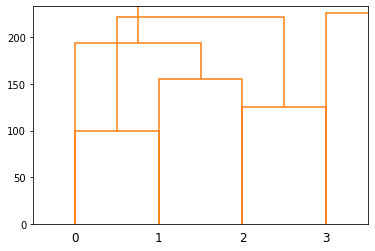

In [95]:
col_pairwise_dists_0 = distance.squareform(distance.pdist(weekday_color.T))
col_pairwise_dists_1 = distance.squareform(distance.pdist(weekend_color.T))
col_clusters_0 = sch.linkage(col_pairwise_dists_0,method='complete')
col_clusters_1 = sch.linkage(col_pairwise_dists_1,method='complete')
col_denD_0 = sch.dendrogram(col_clusters_0,color_threshold=np.inf)
col_denD_1 = sch.dendrogram(col_clusters_1,color_threshold=np.inf)

weekday_xticks = np.array(weekday_xticks)[[col_denD_0['leaves']]]
weekend_xticks = np.array(weekend_xticks)[[col_denD_1['leaves']]]
weekday_color = np.array(weekday_color.T[col_denD_0['leaves'],:]).T
weekend_color = np.array(weekend_color.T[col_denD_1['leaves'],:]).T

weekday_size = np.array(weekday_size.T[col_denD_0['leaves'],:]).T
weekend_size = np.array(weekend_size.T[col_denD_1['leaves'],:]).T

# Plot the new_heatmap

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/fanyue/AMN_project/new_heatmap.py:275: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  col_denD_0 = sch.dendrogram(col_clusters_0, color_threshold=np.inf, no_plot = False, ax = ax_dg0)
/Users/fanyue/AMN_project/new_heatmap.py:276: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clean_axis(ax_dg0)


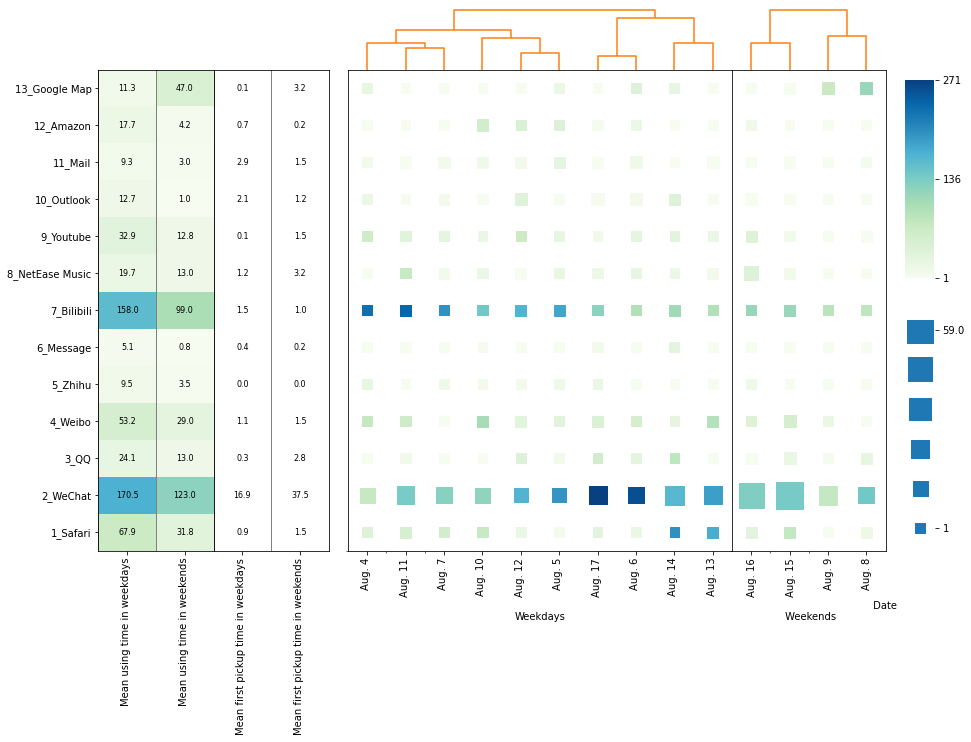

In [116]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2


fig0 = plt.figure(figsize=(15, 10))
multi_group_heatmap(
    index_group = group_color_mean,
    index_group_x_ticks = ['Mean using time in weekdays', 'Mean using time in weekends'],
    group0 = weekday_color,
    group1 = weekend_color,
    col_pairwise_dists_0 = col_pairwise_dists_0,
    col_pairwise_dists_1 = col_pairwise_dists_1,
    group0_x_ticks = weekday_xticks,
    group1_x_ticks = weekend_xticks,
    size0 = weekday_size,
    size1 = weekend_size,
    size_scale=700, # Change the overall cube size 
    x_axis_label0 = '\nWeekdays',
    x_axis_label1 ='                                                 Date\n Weekends',
    y_ticks = np.array(yticks).astype(str),
    color_range = [0+1,max(np.max(weekend_color),np.max(weekday_color))],
    size_range = [0+1,max(np.max(weekend_size),np.max(weekday_size))],
    chart = group_size_mean,
    chart_x_ticks = ['Mean first pickup time in weekdays','Mean first pickup time in weekends'],
    palette=("GnBu",256),
    color_bar = True,
    size_bar = True,
    space_in_size_bar = 2
#     high_ligh_y_ticks = (0,0)
)

# After log, plot again

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/fanyue/AMN_project/new_heatmap.py:271: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  col_clusters_0 = sch.linkage(col_pairwise_dists_0, method='complete')
/Users/fanyue/AMN_project/new_heatmap.py:272: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  col_clusters_1 = sch.linkage(col_pairwise_dists_1, method='complete')


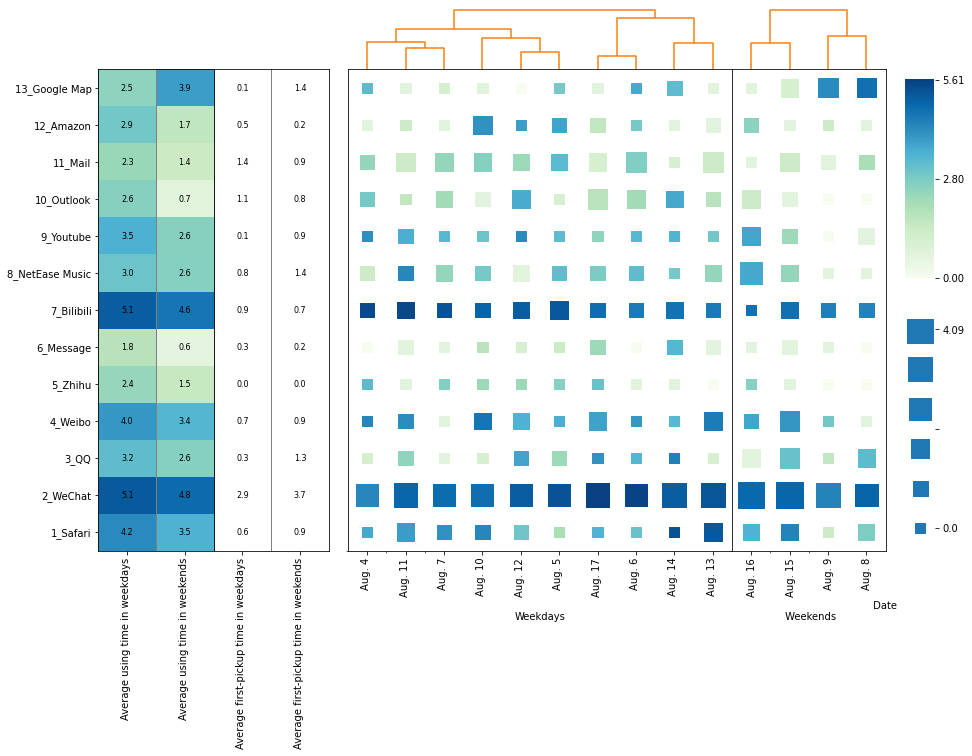

In [111]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2


fig0 = plt.figure(figsize=(15, 10))
multi_group_heatmap(
    index_group = np.log(group_color_mean+np.ones(group_color_mean.shape)),
    index_group_x_ticks = ['Average using time in weekdays', 'Average using time in weekends'],
    group0 = np.log(weekday_color+np.ones(weekday_color.shape)),
    group1 = np.log(weekend_color+np.ones(weekend_color.shape)),
    col_pairwise_dists_0 = col_pairwise_dists_0,
    col_pairwise_dists_1 = col_pairwise_dists_1,
    group0_x_ticks = weekday_xticks,
    group1_x_ticks = weekend_xticks,
    size0 = np.log(weekday_size + np.ones(weekday_size.shape)),
    size1 = np.log(weekend_size + np.ones(weekend_size.shape)),
    size_scale=700, # Change the overall cube size 
    x_axis_label0 = '\nWeekdays',
    x_axis_label1 ='                                                 Date\n Weekends',
    y_ticks = np.array(yticks).astype(str),
    color_range = [np.log(0+1),np.log(max(np.max(weekend_color),np.max(weekday_color))+1)],
    size_range = [np.log(0+1),np.log(max(np.max(weekend_size),np.max(weekday_size))+1)],
    chart = np.log(group_size_mean + np.ones(group_size_mean.shape)),
    chart_x_ticks = ['Average first-pickup time in weekdays','Average first-pickup time in weekends'],
    palette=("GnBu",256),
    color_bar = True,
    size_bar = True,
    space_in_size_bar = 2
#     high_ligh_y_ticks = (0,0)
)